In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../cleaned_data/clean_v5_fillednans.csv', delimiter=',')
df.head(10)

,Country,Year,Happiness index,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,Self-employment rate,Poverty rate,Unemployed youth rate,Households overcrowding,Internet access,Home access to computers,Unemployment benefits,Average wage,Health spending,Happy country
0,Italy,2005,5.954524,10.622244,0.927213,73.199997,0.623742,-0.080541,0.902801,0.685423,...,28.149700,0.173000,9.351012,18.734644,78.510000,72.543600,59.000000,40192.935976,8.725,1
1,Belgium,2006,6.948936,10.819170,0.928964,71.599998,0.865759,-0.055826,0.496659,0.764590,...,18.449340,0.092000,4.333516,2.639921,84.785700,82.091500,81.000000,55525.989944,10.773,1
2,Brazil,2006,6.190922,9.588520,0.881505,66.400002,0.750609,-0.117002,0.763251,0.749728,...,36.786170,0.341000,18.686466,11.405780,66.662982,41.758582,42.076433,40640.148718,9.465,0
3,Chile,2006,6.579056,10.074142,0.841388,69.699997,0.652290,0.102443,0.858125,0.869229,...,25.639640,0.211000,11.449327,9.253412,79.297795,63.629382,37.000000,28252.106420,8.519,1
4,Colombia,2006,6.448789,9.546183,0.907403,66.580002,0.801191,-0.090322,0.886646,0.847080,...,53.237450,0.151515,18.539675,11.405780,37.980998,44.466586,42.076433,40640.148718,1.170,0
5,Costa Rica,2006,7.135618,9.830494,0.900701,70.900002,0.872972,-0.032443,0.780562,0.873584,...,23.440560,0.275000,19.001392,11.405780,64.800000,51.700000,42.076433,40640.148718,1.610,0
6,Czech Republic,2006,6.897091,10.530134,0.964054,71.300003,0.906422,-0.127022,0.883700,0.832058,...,20.280030,0.064000,2.383190,12.235024,88.020400,82.181500,13.000000,29884.588816,9.068,1
7,Estonia,2006,6.452564,10.458589,0.957770,69.000000,0.954201,-0.082279,0.397835,0.806924,...,19.878318,0.087000,4.007430,9.949997,89.977400,86.909000,46.000000,30720.263072,8.052,0
8,France,2006,7.008065,10.673645,0.935351,71.839996,0.833327,-0.031021,0.668876,0.745672,...,10.561430,0.120000,5.813051,8.013675,62.319700,68.355700,69.000000,42102.296732,10.501,1
9,Greece,2006,5.839559,10.433106,0.868422,71.500000,0.484111,-0.302877,0.954114,0.633947,...,38.746400,0.156000,7.471760,19.094563,46.351200,53.386500,41.000000,32421.798287,9.597,0


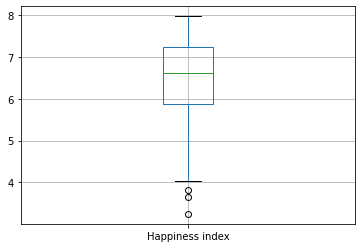

In [3]:
df_data = df.drop('Year', axis=1)
df_cols = df.columns.values
pd.DataFrame(df_data['Happiness index']).boxplot()
plt.show()

In [11]:
cols = ['Country', 'Happiness mean']
df_country_mean_hp = pd.DataFrame(columns=cols)
countries = df['Country'].unique()
for c in countries:
    temp = df.loc[df['Country'] == c];
    new_df = pd.DataFrame([[c, temp['Happiness index'].mean()]], columns=cols)
    df_country_mean_hp = pd.concat([df_country_mean_hp, new_df])
df_country_mean_hp.sort_values(by='Happiness mean', ascending=False, inplace=True)
df_country_mean_hp.reset_index(drop=True, inplace=True)
display(df_country_mean_hp)

,Country,Happiness mean
0,Denmark,7.656117
1,Finland,7.597216
2,Switzerland,7.548228
3,Norway,7.512566
4,Netherlands,7.46647
5,Iceland,7.434307
6,Sweden,7.369042
7,Canada,7.368788
8,New Zealand,7.310304
9,Australia,7.277512
